In [1]:
import scipy.stats as sps
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib.pyplot as plt
from array import array
import numpy as np
import math
from scipy import stats
import pandas as pd

In [2]:
xls = pd.ExcelFile(r'./../table.xls')
df = xls.parse(3)
df

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
0,64,Female,Former,21.48380,Often,1298.8,57.0,6.3,0.0,170.3,1945,890,200,915
1,76,Female,Never,23.87631,Often,1032.5,50.1,15.8,0.0,75.8,2653,451,124,727
2,38,Female,Former,20.01080,Not often,2372.3,83.6,19.1,14.1,257.9,6321,660,328,721
3,40,Female,Former,25.14062,No,2449.5,97.5,26.5,0.5,332.6,1061,864,153,615
4,72,Female,Never,20.98504,Often,1952.1,82.6,16.2,0.0,170.8,2863,1209,92,799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,46,Female,Former,25.89669,No,2263.6,98.2,19.4,2.6,306.5,2572,1261,164,216
311,45,Female,Never,23.82703,Often,1841.1,84.2,14.1,2.2,257.7,1665,465,80,328
312,49,Female,Never,24.26126,Often,1125.6,44.8,11.9,4.0,150.5,6943,520,300,502
313,31,Female,Former,23.45255,Often,2729.6,144.4,13.2,2.2,381.8,741,644,121,684


In [3]:
X1 = df.C11.to_numpy()
X2 = df.C12.to_numpy()

X1.shape, X2.shape

((315,), (315,))

## $Z = \frac{H - \frac{1}{2}}{\sqrt(\frac{1}{4n})} = 2\sqrt(n)(H - \frac{1}{2})$
## $Z = \frac{1}{\sqrt(2\pi)\sigma}exp(-\frac{(x - \mu)^2}{2\sigma^2})$

In [4]:
stats.wilcoxon(X1, X2)

WilcoxonResult(statistic=2424.0, pvalue=7.896088644123942e-44)

In [5]:
def two_sample_chisquare(dist1, dist2, bins=11):
    bins1, counts1 = np.histogram(dist1, bins=bins)
    bins2, counts2 = np.histogram(dist2, bins=bins)
    Z = np.sum((counts1 - counts2) ** 2 / counts1)
    return Z, 1 - stats.chi2.cdf(Z, 2)

In [6]:
two_sample_chisquare(X1, X2)

(5293.713219585955, 0.0)

In [42]:
def sterges(X):
    return 1.332 * int(np.log(len(X)))

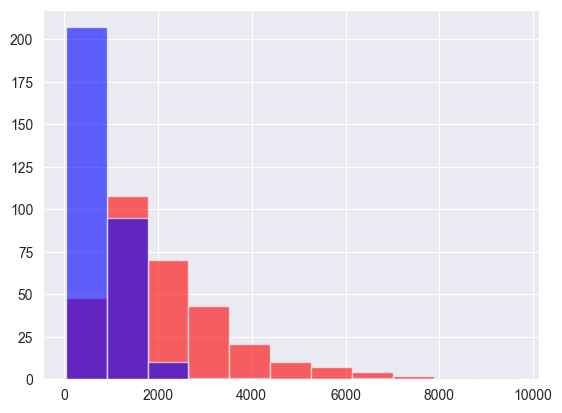

In [48]:
_, bins3 = np.histogram(np.concatenate([X1, X2]), bins=11)
freq1, _, _ = plt.hist(X1, bins=bins3, fill=True, color='red', alpha=0.6)
freq2, _, _ = plt.hist(X2, bins=bins3, fill=True, color='blue', alpha=0.6)
plt.show()

In [49]:
freq1

array([ 48., 108.,  70.,  43.,  21.,  10.,   7.,   4.,   2.,   1.,   1.])

In [50]:
freq2

array([207.,  95.,  10.,   1.,   1.,   0.,   0.,   1.,   0.,   0.,   0.])

In [62]:
acc1 = freq1 / len(X1)
acc1

array([0.15238095, 0.34285714, 0.22222222, 0.13650794, 0.06666667,
       0.03174603, 0.02222222, 0.01269841, 0.00634921, 0.0031746 ,
       0.0031746 ])

In [63]:
acc2 = freq1 / len(X1)
acc2

array([0.15238095, 0.34285714, 0.22222222, 0.13650794, 0.06666667,
       0.03174603, 0.02222222, 0.01269841, 0.00634921, 0.0031746 ,
       0.0031746 ])

In [66]:
data = {
    'Номер интервала': list(range(len(bins3) - 1)),
    'Нижняя граница': bins3[:-1],
    'Верхняя граница': bins3[1:],
    'Частота признака 1': freq1,
    'Частота признака 2': freq2,
    'Относит. частота признака 1': acc1,
    'Относит. частота признака 2': acc2
}
df = pd.DataFrame(data)
df.to_excel('bdz3.xlsx')